<a href="https://colab.research.google.com/github/oamerl/machine-learning-projects/blob/main/Deep-Learning/leaf-classification/Leaf_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Analysis and Check

Importing the needed libraries and the data

In [ ]:
# importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# importing google drive as we have uploaded the data to it
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Specifing the project path on google drive
proj_path = '/content/gdrive/MyDrive/leaf-classification/'

# Load the data into a DataFrame
train_data = pd.read_csv(proj_path + 'train.csv') # reading the training dataset file
test_data = pd.read_csv(proj_path + 'test.csv') # reading the testing dataset file
images_folder = '/content/gdrive/MyDrive/leaf-classification/images/'
#/content/gdrive/MyDrive/leaf-classification/images

Exploring the characteristics of the data

Firts we will start by removing any duplicate rows and checking for missing/null values

In [ ]:
# First, lets drop any duplicate rows (if any)
print(train_data.duplicated().sum(), "duplicates found")
train_data.drop_duplicates(inplace=True)

0 duplicates found


In [ ]:
# missing values per-column
nulls_per_feature = train_data.isnull().sum().sort_values(ascending=False)
nulls_per_feature[nulls_per_feature != 0]

Series([], dtype: int64)

In [ ]:
print("number of nulls found:", nulls_per_feature.sum())

number of nulls found: 0


As shown the series is empty which means there are no null values

In [ ]:
# printing the first 6 rows of the training set
train_data.head(6)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250
5,8,Magnolia_Salicifolia,0.070312,0.093750,0.033203,0.001953,0.000000,0.152340,0.007812,0.0,...,0.145510,0.000000,0.041992,0.000000,0.005859,0.0,0.0,0.000000,0.001953,0.013672


Conserving the "id" of the sample as the dataframe index

In [ ]:
train_data.set_index('id', inplace = True) # setting the index of the training set dataframe to be the coulmn named "id" such that we don't lose it.
test_data.set_index('id', inplace = True) # setting the index of the testing set dataframe to be the coulmn named "id" such that we don't lose it.

In [ ]:
train_data.describe() # checking different statistics of the data

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,0.018639,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,0.016071,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,0.005859,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,0.015625,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,0.027344,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,0.097656,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [ ]:
# printing different info about the trainig set like the data types of features and if there are any null values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 1 to 1584
Columns: 193 entries, species to texture64
dtypes: float64(192), object(1)
memory usage: 1.5+ MB


Its shown that the data has 990 record with 193 features. The features datatypes contain "object" which is the species name (our target label) and the rest of features are float. Notice that the "id" will not appear now as it has become the index of the dataframe.

As will be demonstrated below the data has 99 different species each specie has 10 samples/records making up the whole 990 training samples

In [ ]:
# printing the number of different species
train_data.species.nunique()

99

In [ ]:
# printing the number of samples/species
train_data.species.value_counts().values

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

Plotting the histogram of the target label which is the "species"


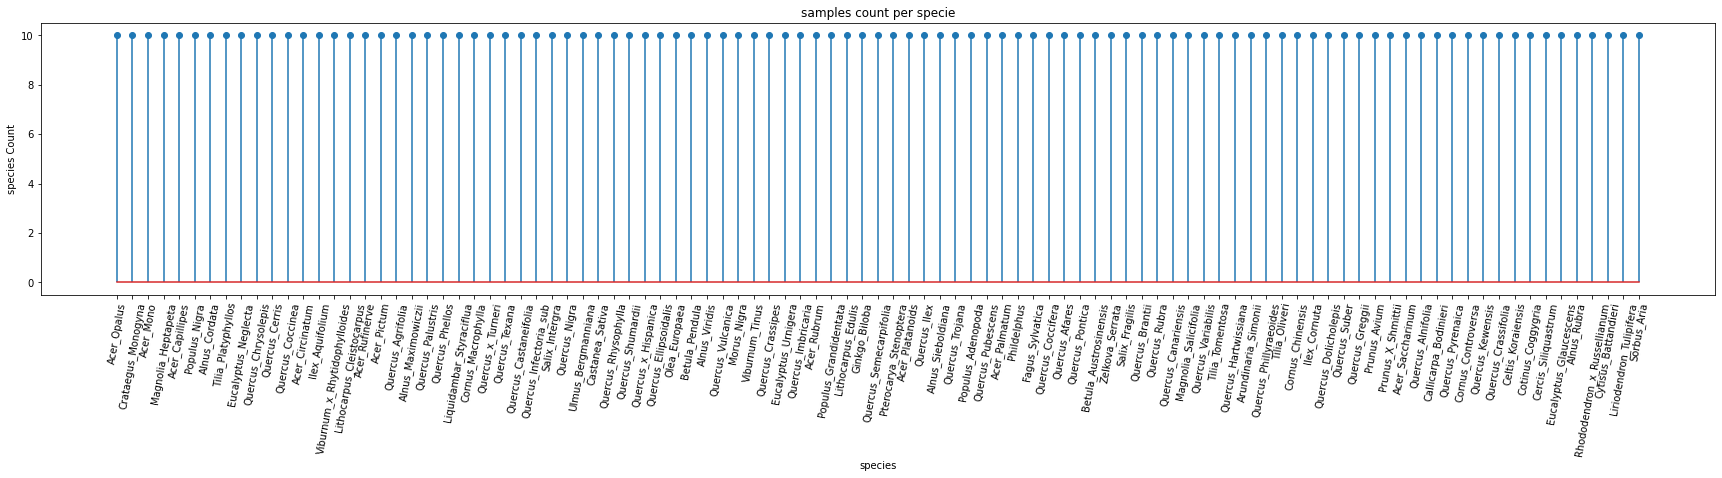

In [ ]:
plt.figure(figsize=(30,5))
plt.stem(train_data.species.value_counts().index.values, train_data.species.value_counts().values)
plt.xticks(rotation = 80)
plt.xlabel("species")
plt.ylabel("species Count")
plt.title('samples count per specie')
plt.show()

Plotting pairwise correlation between features


<Axes: >

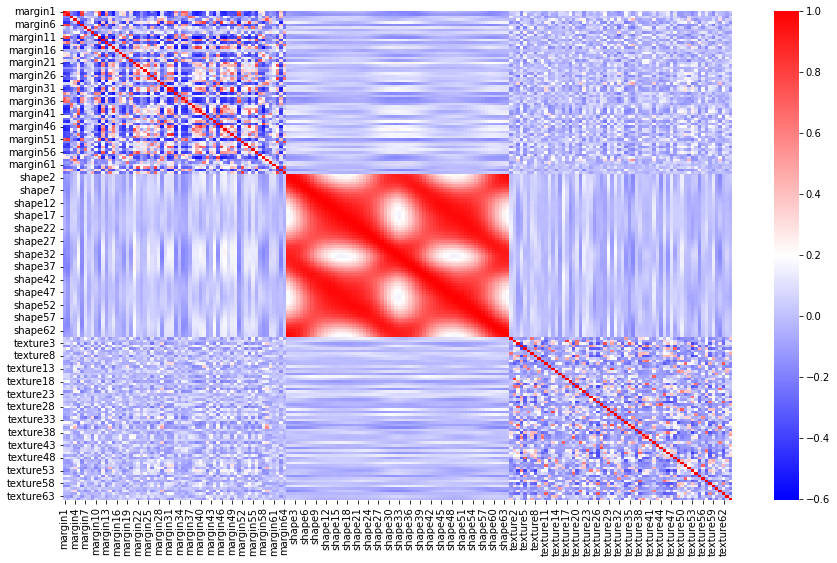

In [ ]:
plt.figure(figsize=(15,9)) # changing the figure size such that correlation number can be easily seen
sns.heatmap(data = train_data.corr(),cmap='bwr') # using seaborn library correlation function

Another interactive way for seeing the correlation between the features is by using plotly express where we can zoom in and out to a specific area of the matrix

We can notice that the "shape" feature attributes are highly correlated

In [ ]:
import plotly.express as px
fig1 = px.imshow(train_data.corr())
fig1.show()

In [ ]:
train_data.index[:10]

Int64Index([1, 2, 3, 5, 6, 8, 10, 11, 14, 15], dtype='int64', name='id')

Drawing some of the Images

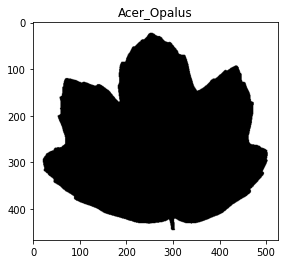

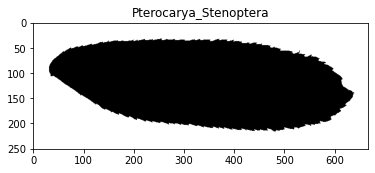

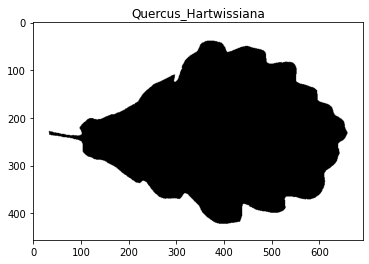

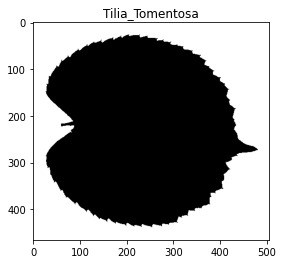

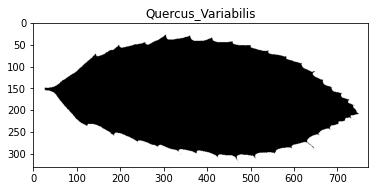

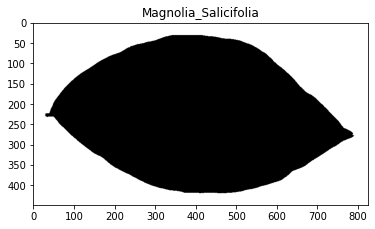

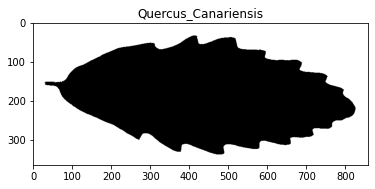

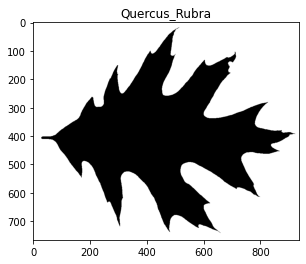

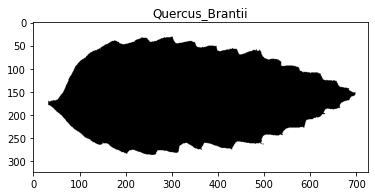

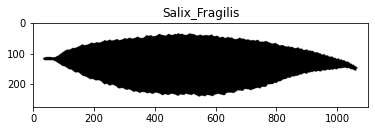

In [ ]:
# drawing the first 10 images
for sample_id in train_data.index[:10]:
    image_path = images_folder + str(sample_id) + ".jpg"
    image = plt.imread(image_path)
    image_species_title = train_data.loc[train_data.index == sample_id, "species"].values[0]
    fig = plt.figure()
    plt.imshow(image, cmap="binary")
    plt.title(image_species_title)


Images characteristics

In [ ]:
# checking the last printed image characteristics
print("image dimensions:", image.shape)
mn = np.min(image)
mx = np.max(image)
print("range: [%.4f, %.4f]" % (mn, mx))
print("data type:", image.dtype)

image dimensions: (275, 1101)
range: [0.0000, 255.0000]
data type: uint8


Splitting of training set into training and validation and decoupling the features from the labels

Decoupling the training dataset's features matrix and labels vetcor

In [ ]:
y_train = train_data["species"] # target label series
X_train = train_data.drop(['species'], axis=1) # training features df

In [ ]:
y_train

id
1                 Acer_Opalus
2       Pterocarya_Stenoptera
3        Quercus_Hartwissiana
5             Tilia_Tomentosa
6          Quercus_Variabilis
                ...          
1575     Magnolia_Salicifolia
1578              Acer_Pictum
1581       Alnus_Maximowiczii
1582            Quercus_Rubra
1584           Quercus_Afares
Name: species, Length: 990, dtype: object

Encode the target label using sklearn LabelEncoder and will later use sparse categorical cross entropy where it will be converted to one hot encoding internally during error/loss calculation.

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)

In [ ]:
X_train.shape # training feature shape

(990, 192)

In [ ]:
y_train.shape # training label shape

(990,)

Dividing the Training data into training and validation sets

In [ ]:
# splitting the dataset into 80% training and 20% testing while using stratify to ensure equal class distribution in training and validation sets
X_tr, X_valid, y_tr, y_valid = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train, random_state=1)

print("Training data shape:",X_tr.shape) # printing training data number of rows and coulmns
print("Testing data shape",X_valid.shape) # printing validation data number of rows and coulmns
print("Training labels shape",y_tr.shape) # printing training target label number of rows
print("Testing labels shape",y_valid.shape) # printing validation target label number of rows

Training data shape: (792, 192)
Testing data shape (198, 192)
Training labels shape (792,)
Testing labels shape (198,)


# Neural Netork Building

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


Install and import the Keras Tuner and Tensorflow Addons.

In [ ]:
# keras tuner for hyperparameters search
!pip install -q -U keras-tuner
import keras_tuner as kt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 KB 4.0 MB/s eta 0:00:00


In [ ]:
# tensor board for training visulaization
!pip install tensorflow-addons
import tensorflow_addons as tfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.7 MB/s eta 0:00:00


In [ ]:
#keras.backend.clear_session()  #Clear the session to remove weights

class MyHyperModel(kt.HyperModel):
    def build(self, hp):
        model = keras.Sequential()

        # input layer
        model.add(keras.Input(shape=(192,))) # 192 is the number of features

        # hidden layer
        model.add(layers.Dense(
                units = hp.Int("hidden-units", min_value=16, max_value=768, step=16), # tune number of hidden units.
                activation = "tanh")
        )

        # Tune whether to use dropout and tune its rate
        model.add(layers.Dropout(rate = hp.Float("dropout-rate", min_value=0.0, max_value=0.5, step=0.05)))

        # output layer
        model.add(layers.Dense(units = 99, activation="softmax")) # 99 is the number of classses

        model.compile(
            optimizer = tfa.optimizers.AdamW(learning_rate = hp.Float('learning-rate', min_value=1e-3, max_value=0.5, sampling='LOG'), # tune learning rate.
                                           weight_decay = hp.Float('weight-decay', min_value=0.0, max_value=0.1, step=0.001)), # tune weight decay regularization.
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"],
        )
        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size = hp.Int("batch-size", min_value=36, max_value=792, step=36), # tune the batch size, 792 is the whole training set after splitting
            **kwargs,
        )



We do a quick check to see if the model builds successfully


In [ ]:
hp = kt.HyperParameters()
hypermodel = MyHyperModel()
model = hypermodel.build(hp)
hypermodel.fit(hp, model, X_tr, y_tr)

22/22 [==============================] - 1s 3ms/step - loss: 4.5939 - accuracy: 0.0139


Selecting and initializing the tuner class to run the search

In [ ]:
tuner = kt.Hyperband(
    MyHyperModel(),
    objective="val_accuracy", # objective is to find the hyperparameters that maximizes the validation accuracy
    max_epochs=500, # the maximum number of epochs to train one model (to be truncated by early stopping)
    overwrite=True, # do not resume the previous search in the same directory.
    directory = proj_path, # path on google drive, a directory to store the intermediate results.
    project_name="tune_hypermodel", # detailed logs, checkpoints, etc, can be found in the folder directory/project_name.
)

In [ ]:
tuner.search_space_summary(extended=True)

Search space summary
Default search space size: 5
hidden-units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 768, 'step': 16, 'sampling': 'linear'}
dropout-rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': 'linear'}
learning-rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.001, 'max_value': 0.5, 'step': None, 'sampling': 'log'}
weight-decay (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.1, 'step': 0.001, 'sampling': 'linear'}
batch-size (Int)
{'default': None, 'conditions': [], 'min_value': 36, 'max_value': 792, 'step': 36, 'sampling': 'linear'}


Starting the search for the best hyperparameter configuration

In [ ]:
# defining early stop criteria
earlystop_callback =  keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, start_from_epoch = 3)

# tensorboard callback
tensorboard_callback = keras.callbacks.TensorBoard(proj_path + "tb_logs")

In [ ]:
import datetime

start_time = datetime.datetime.now()

tuner.search(X_tr, y_tr,
             validation_data=(X_valid, y_valid),
             callbacks=[earlystop_callback, tensorboard_callback])

end_time = datetime.datetime.now()


Trial 725 Complete [00h 00m 04s]
val_accuracy: 0.8232323527336121

Best val_accuracy So Far: 0.9848484992980957
Total elapsed time: 00h 39m 31s


In [ ]:
elapsed_time = end_time - start_time

print(f"time taken to search for optimal hyperparameters is: {elapsed_time}")

time taken to search for optimal hyperparameters is: 0:39:31.167138


In [ ]:
%load_ext tensorboard
#%tensorboard --logdir /content/gdrive/MyDrive/leaf-classification/tb_logs


When search is over, we can query the results and retrieve the best model(s). The model is saved at its best performing epoch evaluated on the validation_data.

In [ ]:
# Get the top 3 models.
best_models = tuner.get_best_models(num_models=3)

In [ ]:
best_models[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               24704     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 99)                12771     
                                                                 
Total params: 37,475
Trainable params: 37,475
Non-trainable params: 0
_________________________________________________________________


In [ ]:
best_models[1].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               24704     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 99)                12771     
                                                                 
Total params: 37,475
Trainable params: 37,475
Non-trainable params: 0
_________________________________________________________________


In [ ]:
best_models[2].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 608)               117344    
                                                                 
 dropout (Dropout)           (None, 608)               0         
                                                                 
 dense_1 (Dense)             (None, 99)                60291     
                                                                 
Total params: 177,635
Trainable params: 177,635
Non-trainable params: 0
_________________________________________________________________


Print a summary of the search results.

In [ ]:
tuner.results_summary(num_trials=5)

Results summary
Results in /content/gdrive/MyDrive/leaf-classification/tune_hypermodel
Showing 5 best trials
Objective(name="val_accuracy", direction="max")

Trial 0422 summary
Hyperparameters:
hidden-units: 128
dropout-rate: 0.25
learning-rate: 0.0344474879394729
weight-decay: 0.002
batch-size: 108
tuner/epochs: 167
tuner/initial_epoch: 56
tuner/bracket: 5
tuner/round: 4
tuner/trial_id: 0411
Score: 0.9848484992980957

Trial 0426 summary
Hyperparameters:
hidden-units: 128
dropout-rate: 0.25
learning-rate: 0.0344474879394729
weight-decay: 0.002
batch-size: 108
tuner/epochs: 500
tuner/initial_epoch: 167
tuner/bracket: 5
tuner/round: 5
tuner/trial_id: 0422
Score: 0.9797979593276978

Trial 0595 summary
Hyperparameters:
hidden-units: 608
dropout-rate: 0.05
learning-rate: 0.08052440687487096
weight-decay: 0.031
batch-size: 216
tuner/epochs: 167
tuner/initial_epoch: 56
tuner/bracket: 4
tuner/round: 3
tuner/trial_id: 0580
Score: 0.9797979593276978

Trial 0385 summary
Hyperparameters:
hidden-un

Next we will do the following


1.   Define a training function to build and fit the best 12 models using the best 12 hyperparameters combinations for example by defining

> hypermodel = MyHyperModel() then

> best_hp = tuner.get_best_hyperparameters()[0]

> model1 = hypermodel.build(best_hp) and

> hypermodel.fit(best_hps, model1, X_tr, y_tr, epochs =100)

2.   Draw epoch vs accuracy and losses for each model
3.   Define a function to evaluate the 12 best models using model1.evaluate(X_tr,y_tr) to evaluate both training and validation data that returns the accuracy and loss
4.   Plot the accuracy and loss for all the 12 models








Model Training Function

In [ ]:
def model_training(best_hyperparams_index, tr_X, tr_y, val_X, val_y):

    # using the passed index to access and get the corresponding best hyperparameters object
    best_hp = tuner.get_best_hyperparameters(20)[best_hyperparams_index]

    # instantiating the hypermodel and compiling it with the chosen hyperparameters object
    hypermodel = MyHyperModel()
    model = hypermodel.build(best_hp)

    # defining early stop criteria
    earlystop_callback =  keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, start_from_epoch = 3)
    # tensorboard callback
    tensorboard_callback = keras.callbacks.TensorBoard(proj_path + f"tb_model_{best_hyperparams_index}_logs")

    # training the model
    history = hypermodel.fit(best_hp,
                             model,
                             tr_X, tr_y,
                             validation_data=(val_X, val_y),
                             epochs =500,
                             callbacks=[earlystop_callback, tensorboard_callback],
                             verbose = 0)

    #training_log_folder = f"/content/gdrive/MyDrive/leaf-classification/tb_model_{best_hyperparams_index}_logs"
    #%tensorboard --logdir={training_log_folder}

    return (model, history)

Model Evaluation Function

In [ ]:
def model_evaluation(model, X_eval, y_eval):
    loss, accuracy = model.evaluate(X_eval, y_eval)

    return loss, accuracy

Metrics Plotting Function

In [ ]:
def model_history_plot(history):

    tr_accuracy= history.history['accuracy']
    val_accuracy= history.history['val_accuracy']

    tr_loss= history.history['loss']
    val_loss= history.history['val_loss']

    epochs = len(tr_accuracy)+1

    fig = plt.figure(figsize=(20,8))
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.7)

    ax2 = fig.add_subplot(131)
    plt.title(f"Training and Validation Accuracy VS Epochs")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(np.arange(1, epochs), val_accuracy, label="validation accuracy")
    plt.plot(np.arange(1,epochs), tr_accuracy, label = "training accuracy")
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")

    ax1 = fig.add_subplot(132)
    plt.title(f"Training and Validation Loss VS Epochs")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(np.arange(1,epochs), val_loss, label="validation loss")
    plt.plot(np.arange(1,epochs), tr_loss, label = "training loss")
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")

    plt.show()


# Models Training and Evaluation

Hyperparameters table for the best 20 combinations

In [ ]:
num_of_hidden_layers = []
drop_out_rates = []
learning_rates = []
weight_decay = []
batch_size = []

for hyperparams in tuner.get_best_hyperparameters(num_trials=20):
    num_of_hidden_layers.append(hyperparams.get("hidden-units"))
    drop_out_rates.append(hyperparams.get("dropout-rate"))
    learning_rates.append(hyperparams.get("learning-rate"))
    weight_decay.append(hyperparams.get("weight-decay"))
    batch_size .append(hyperparams.get("batch-size"))

hyperparams_df = pd.DataFrame({ "hidden-units" : num_of_hidden_layers,
                                "dropout-rate" : drop_out_rates,
                                "learning-rate" : learning_rates,
                                "weight-decay" : weight_decay,
                                "batch-size" :batch_size})

hyperparams_df

,hidden-units,dropout-rate,learning-rate,weight-decay,batch-size
0,128,0.25,0.034447,0.002,108
1,128,0.25,0.034447,0.002,108
2,608,0.05,0.080524,0.031,216
3,128,0.25,0.034447,0.002,108
4,128,0.25,0.034447,0.002,108
5,608,0.30,0.056726,0.014,324
6,192,0.45,0.060331,0.007,288
7,608,0.30,0.056726,0.014,324
8,272,0.05,0.060791,0.002,180
9,256,0.05,0.028302,0.008,36


We will execlude combinations number 1,3,4,7,9,13,15,18 as they are repeated sets of same hyperparameters but differ during training in the initial epoch

In [ ]:
hyperparams_df_new = hyperparams_df.drop([1,3,4,7,9, 13,15,18])
hyperparams_df_new

,hidden-units,dropout-rate,learning-rate,weight-decay,batch-size
0,128,0.25,0.034447,0.002,108
2,608,0.05,0.080524,0.031,216
5,608,0.30,0.056726,0.014,324
6,192,0.45,0.060331,0.007,288
8,272,0.05,0.060791,0.002,180
10,256,0.05,0.028302,0.008,36
11,688,0.30,0.048262,0.032,288
12,608,0.05,0.080524,0.031,216
14,192,0.45,0.060331,0.007,288
16,528,0.10,0.049866,0.017,396


Creating empty lists to append it with the training and validation metrics of the models after their training

In [ ]:
models_tr_acc = []
models_tr_loss = []

models_val_acc = []
models_val_loss = []

## Model 1

In [ ]:
hyperparams_df_new.loc[[0]]

,hidden-units,dropout-rate,learning-rate,weight-decay,batch-size
0,128,0.25,0.034447,0.002,108


7/7 [==============================] - 0s 3ms/step - loss: 0.2114 - accuracy: 0.9343


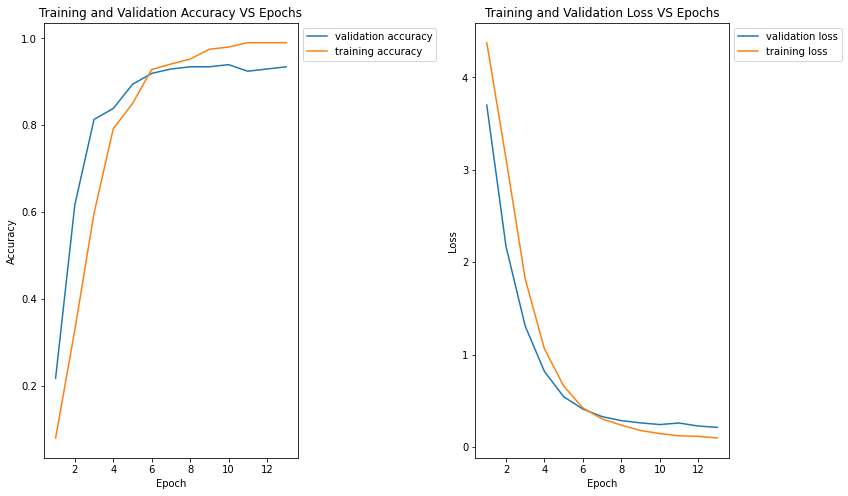

In [ ]:
model_1, model_1_history = model_training(0, X_tr, y_tr, X_valid, y_valid)
model_1_tr_loss, model_1_tr_acc = model_evaluation(model_1, X_tr, y_tr)
model_1_val_loss, model_1_val_acc = model_evaluation(model_1, X_valid, y_valid)
model_history_plot(model_1_history)

In [ ]:
models_tr_acc.append(model_1_tr_acc)
models_tr_loss.append(model_1_tr_loss)
models_val_acc.append(model_1_val_acc)
models_val_loss.append(model_1_val_loss)

## Model 2

In [ ]:
hyperparams_df_new.loc[[2]]

,hidden-units,dropout-rate,learning-rate,weight-decay,batch-size
2,608,0.05,0.080524,0.031,216


7/7 [==============================] - 0s 3ms/step - loss: 0.3535 - accuracy: 0.9596


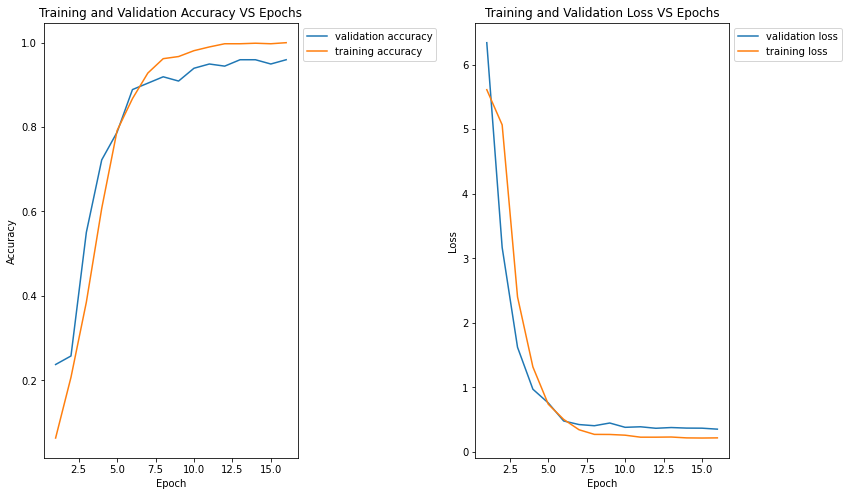

In [ ]:
model_2, model_2_history = model_training(2, X_tr, y_tr, X_valid, y_valid)
model_2_tr_loss, model_2_tr_acc = model_evaluation(model_2, X_tr, y_tr)
model_2_val_loss, model_2_val_acc = model_evaluation(model_2, X_valid, y_valid)
model_history_plot(model_2_history)

In [ ]:
models_tr_acc.append(model_2_tr_acc)
models_tr_loss.append(model_2_tr_loss)
models_val_acc.append(model_2_val_acc)
models_val_loss.append(model_2_val_loss)


## Model 3

In [ ]:
hyperparams_df_new.loc[[5]]

,hidden-units,dropout-rate,learning-rate,weight-decay,batch-size
5,608,0.3,0.056726,0.014,324


7/7 [==============================] - 0s 4ms/step - loss: 0.1540 - accuracy: 0.9545


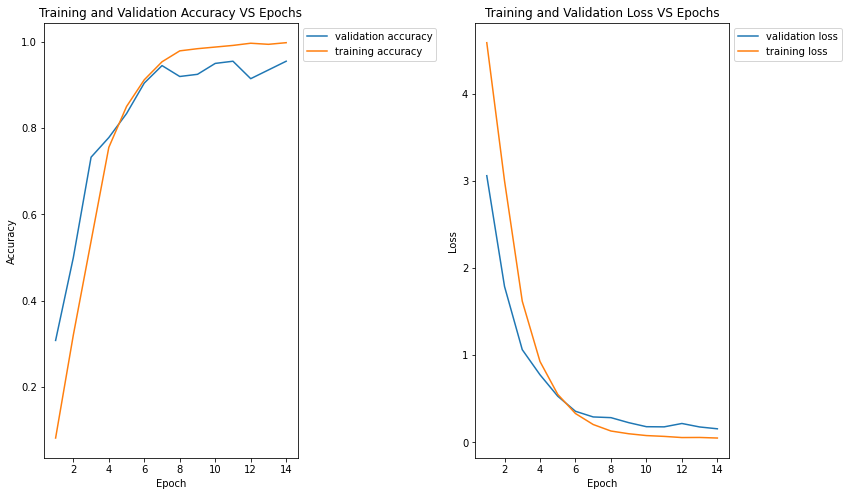

In [ ]:
model_3, model_3_history = model_training(5, X_tr, y_tr, X_valid, y_valid)
model_3_tr_loss, model_3_tr_acc = model_evaluation(model_3, X_tr, y_tr)
model_3_val_loss, model_3_val_acc = model_evaluation(model_3, X_valid, y_valid)
model_history_plot(model_3_history)

In [ ]:
models_tr_acc.append(model_3_tr_acc)
models_tr_loss.append(model_3_tr_loss)
models_val_acc.append(model_3_val_acc)
models_val_loss.append(model_3_val_loss)


## Model 4

In [ ]:
hyperparams_df_new.loc[[6]]

,hidden-units,dropout-rate,learning-rate,weight-decay,batch-size
6,192,0.45,0.060331,0.007,288


7/7 [==============================] - 0s 4ms/step - loss: 0.1655 - accuracy: 0.9495


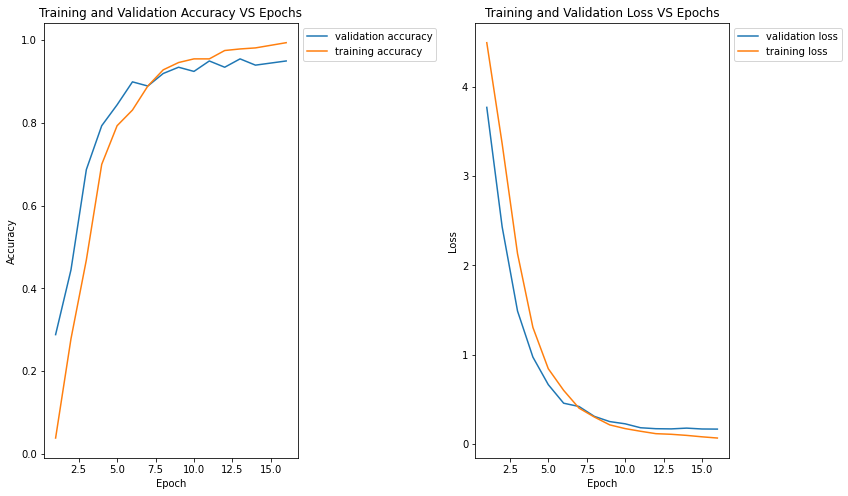

In [ ]:
model_4, model_4_history = model_training(6, X_tr, y_tr, X_valid, y_valid)
model_4_tr_loss, model_4_tr_acc = model_evaluation(model_4, X_tr, y_tr)
model_4_val_loss, model_4_val_acc = model_evaluation(model_4, X_valid, y_valid)
model_history_plot(model_4_history)

In [ ]:
models_tr_acc.append(model_4_tr_acc)
models_tr_loss.append(model_4_tr_loss)
models_val_acc.append(model_4_val_acc)
models_val_loss.append(model_4_val_loss)


## Model 5

In [ ]:
hyperparams_df_new.loc[[8]]

,hidden-units,dropout-rate,learning-rate,weight-decay,batch-size
8,272,0.05,0.060791,0.002,180


7/7 [==============================] - 0s 4ms/step - loss: 0.1343 - accuracy: 0.9495


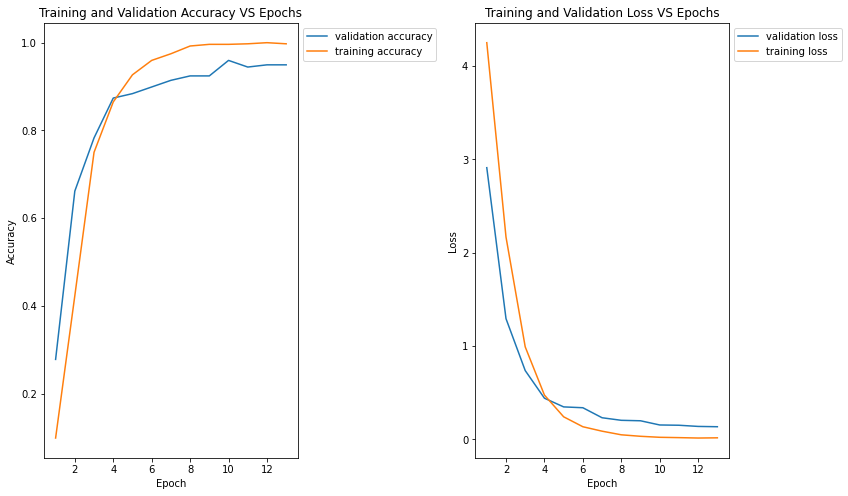

In [ ]:
model_5, model_5_history = model_training(8, X_tr, y_tr, X_valid, y_valid)
model_5_tr_loss, model_5_tr_acc = model_evaluation(model_5, X_tr, y_tr)
model_5_val_loss, model_5_val_acc = model_evaluation(model_5, X_valid, y_valid)
model_history_plot(model_5_history)

In [ ]:
models_tr_acc.append(model_5_tr_acc)
models_tr_loss.append(model_5_tr_loss)
models_val_acc.append(model_5_val_acc)
models_val_loss.append(model_5_val_loss)


## Model 6

In [ ]:
hyperparams_df_new.loc[[10]]

,hidden-units,dropout-rate,learning-rate,weight-decay,batch-size
10,256,0.05,0.028302,0.008,36


7/7 [==============================] - 0s 3ms/step - loss: 0.3400 - accuracy: 0.9242


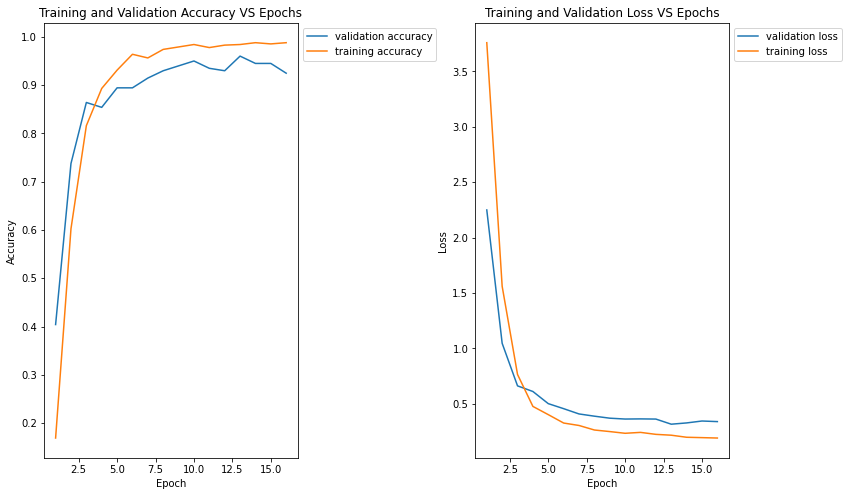

In [ ]:
model_6, model_6_history = model_training(10, X_tr, y_tr, X_valid, y_valid)
model_6_tr_loss, model_6_tr_acc = model_evaluation(model_6, X_tr, y_tr)
model_6_val_loss, model_6_val_acc = model_evaluation(model_6, X_valid, y_valid)
model_history_plot(model_6_history)

In [ ]:
models_tr_acc.append(model_6_tr_acc)
models_tr_loss.append(model_6_tr_loss)
models_val_acc.append(model_6_val_acc)
models_val_loss.append(model_6_val_loss)


## Model 7

In [ ]:
hyperparams_df_new.loc[[11]]

,hidden-units,dropout-rate,learning-rate,weight-decay,batch-size
11,688,0.3,0.048262,0.032,288


7/7 [==============================] - 0s 3ms/step - loss: 0.3138 - accuracy: 0.9495


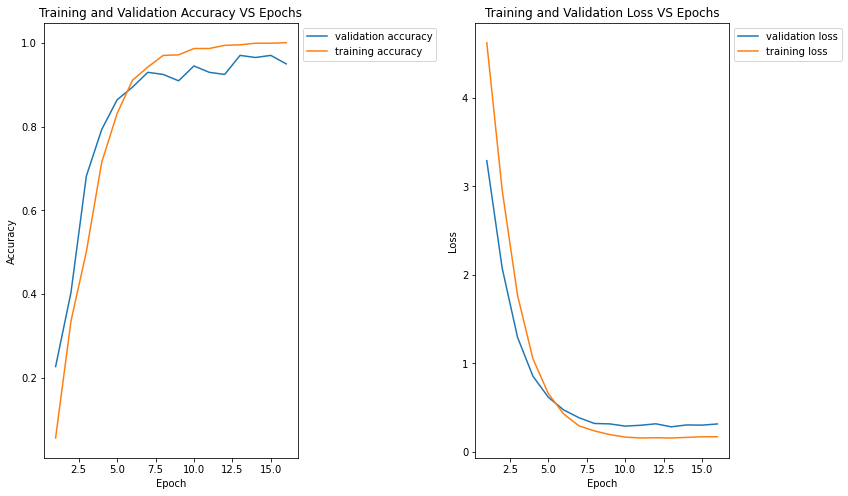

In [ ]:
model_7, model_7_history = model_training(11, X_tr, y_tr, X_valid, y_valid)
model_7_tr_loss, model_7_tr_acc = model_evaluation(model_7, X_tr, y_tr)
model_7_val_loss, model_7_val_acc = model_evaluation(model_7, X_valid, y_valid)
model_history_plot(model_7_history)

In [ ]:
models_tr_acc.append(model_7_tr_acc)
models_tr_loss.append(model_7_tr_loss)
models_val_acc.append(model_7_val_acc)
models_val_loss.append(model_7_val_loss)


## Model 8

In [ ]:
hyperparams_df_new.loc[[12]]

,hidden-units,dropout-rate,learning-rate,weight-decay,batch-size
12,608,0.05,0.080524,0.031,216


7/7 [==============================] - 0s 3ms/step - loss: 0.3997 - accuracy: 0.9444


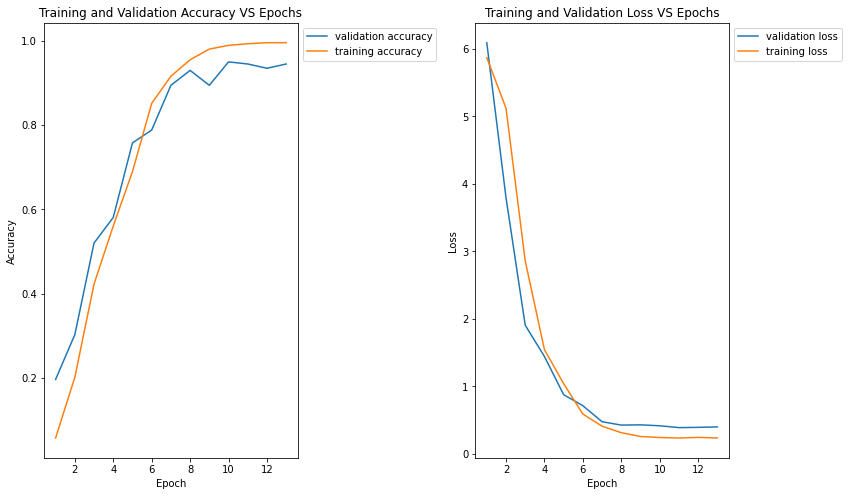

In [ ]:
model_8, model_8_history = model_training(12, X_tr, y_tr, X_valid, y_valid)
model_8_tr_loss, model_8_tr_acc = model_evaluation(model_8, X_tr, y_tr)
model_8_val_loss, model_8_val_acc = model_evaluation(model_8, X_valid, y_valid)
model_history_plot(model_8_history)

In [ ]:
models_tr_acc.append(model_8_tr_acc)
models_tr_loss.append(model_8_tr_loss)
models_val_acc.append(model_8_val_acc)
models_val_loss.append(model_8_val_loss)


## Model 9

In [ ]:
hyperparams_df_new.loc[[14]]

,hidden-units,dropout-rate,learning-rate,weight-decay,batch-size
14,192,0.45,0.060331,0.007,288


7/7 [==============================] - 0s 4ms/step - loss: 0.1476 - accuracy: 0.9596


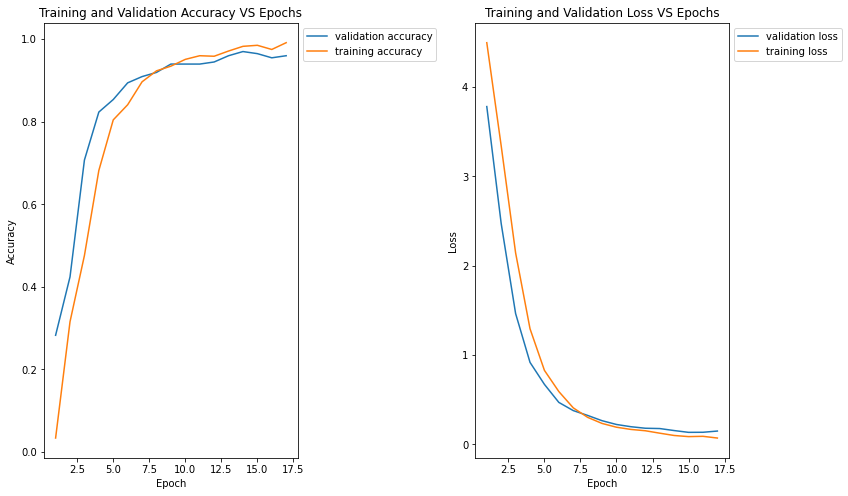

In [ ]:
model_9, model_9_history = model_training(14, X_tr, y_tr, X_valid, y_valid)
model_9_tr_loss, model_9_tr_acc = model_evaluation(model_9, X_tr, y_tr)
model_9_val_loss, model_9_val_acc = model_evaluation(model_9, X_valid, y_valid)
model_history_plot(model_9_history)

In [ ]:
models_tr_acc.append(model_9_tr_acc)
models_tr_loss.append(model_9_tr_loss)
models_val_acc.append(model_9_val_acc)
models_val_loss.append(model_9_val_loss)


## Model 10

In [ ]:
hyperparams_df_new.loc[[16]]

,hidden-units,dropout-rate,learning-rate,weight-decay,batch-size
16,528,0.1,0.049866,0.017,396


7/7 [==============================] - 0s 4ms/step - loss: 0.1620 - accuracy: 0.9545


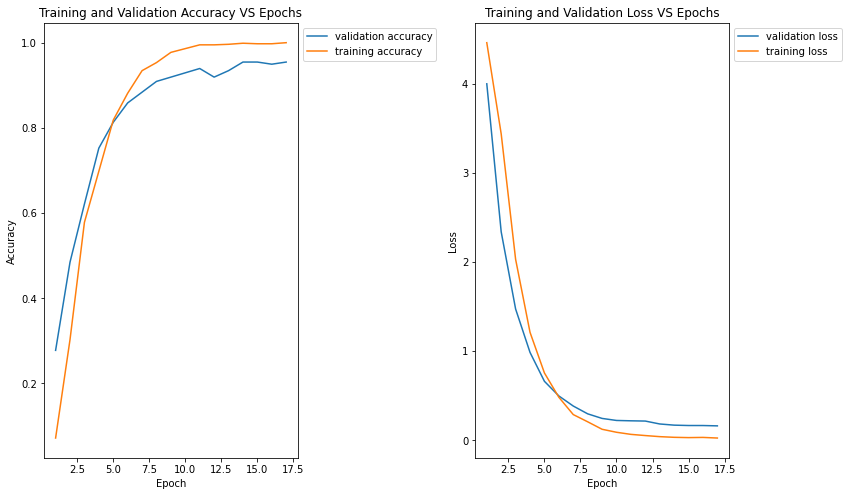

In [ ]:
model_10, model_10_history = model_training(16, X_tr, y_tr, X_valid, y_valid)
model_10_tr_loss, model_10_tr_acc = model_evaluation(model_10, X_tr, y_tr)
model_10_val_loss, model_10_val_acc = model_evaluation(model_10, X_valid, y_valid)
model_history_plot(model_10_history)

In [ ]:
models_tr_acc.append(model_10_tr_acc)
models_tr_loss.append(model_10_tr_loss)
models_val_acc.append(model_10_val_acc)
models_val_loss.append(model_10_val_loss)


## Model 11

In [ ]:
hyperparams_df_new.loc[[17]]

,hidden-units,dropout-rate,learning-rate,weight-decay,batch-size
17,80,0.35,0.145857,0.017,648


7/7 [==============================] - 0s 3ms/step - loss: 0.2602 - accuracy: 0.9394


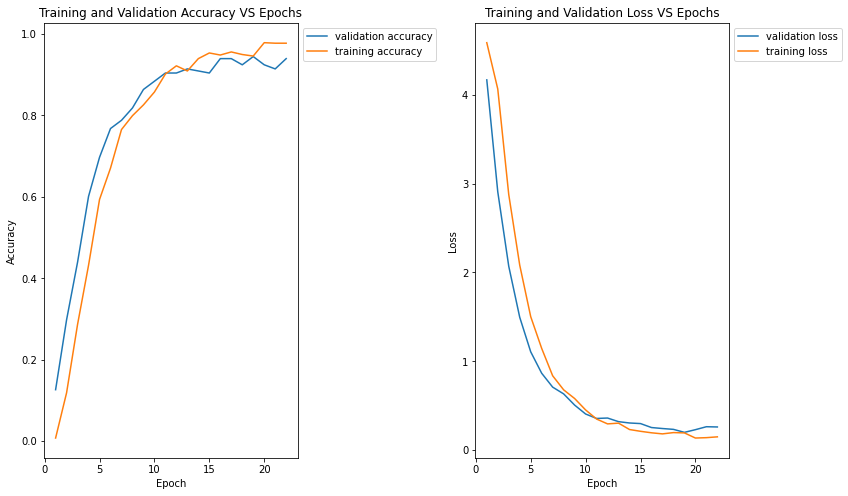

In [ ]:
model_11, model_11_history = model_training(17, X_tr, y_tr, X_valid, y_valid)
model_11_tr_loss, model_11_tr_acc = model_evaluation(model_11, X_tr, y_tr)
model_11_val_loss, model_11_val_acc = model_evaluation(model_11, X_valid, y_valid)
model_history_plot(model_11_history)

In [ ]:
models_tr_acc.append(model_11_tr_acc)
models_tr_loss.append(model_11_tr_loss)
models_val_acc.append(model_11_val_acc)
models_val_loss.append(model_11_val_loss)


## Model 12

In [ ]:
hyperparams_df_new.loc[[19]]

,hidden-units,dropout-rate,learning-rate,weight-decay,batch-size
19,400,0.4,0.041804,0.045,396


7/7 [==============================] - 0s 4ms/step - loss: 0.3716 - accuracy: 0.9293


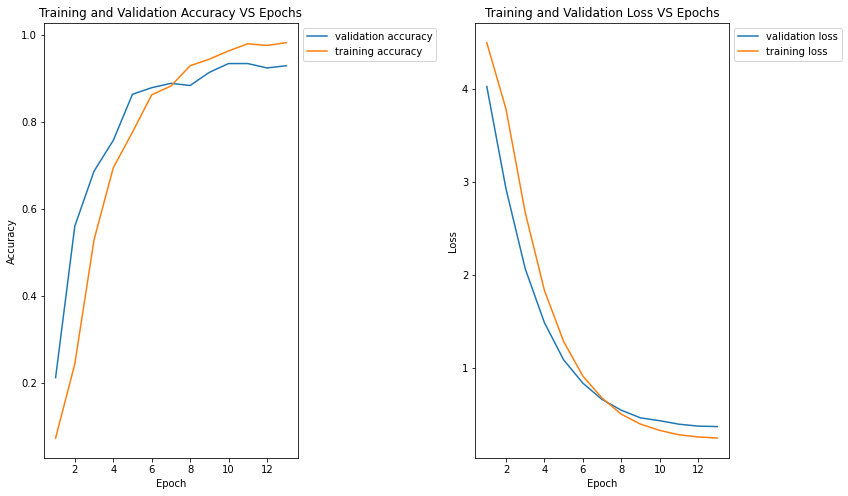

In [ ]:
model_12, model_12_history = model_training(19, X_tr, y_tr, X_valid, y_valid)
model_12_tr_loss, model_12_tr_acc = model_evaluation(model_12, X_tr, y_tr)
model_12_val_loss, model_12_val_acc = model_evaluation(model_12, X_valid, y_valid)
model_history_plot(model_12_history)

In [ ]:
models_tr_acc.append(model_12_tr_acc)
models_tr_loss.append(model_12_tr_loss)
models_val_acc.append(model_12_val_acc)
models_val_loss.append(model_12_val_loss)


Comparing all models performaces

In [ ]:
num_models = len(models_tr_acc)+1 # number of models


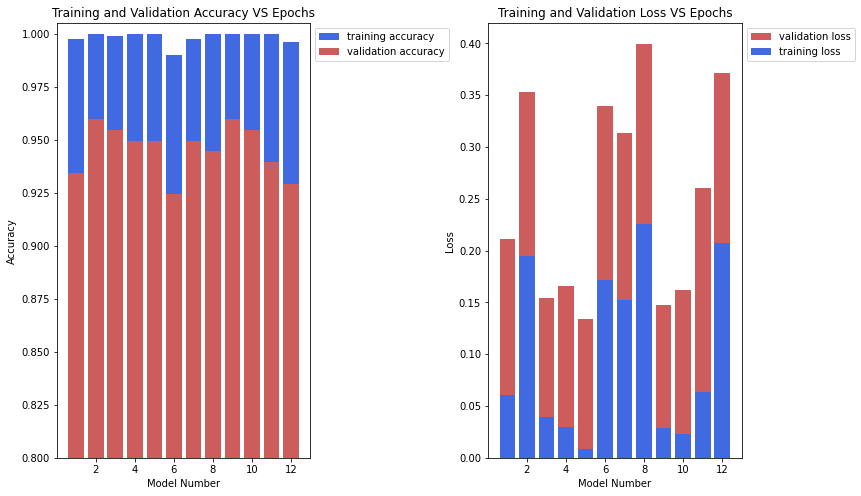

In [ ]:
fig = plt.figure(figsize=(20,8))
fig.tight_layout()
plt.subplots_adjust(wspace=0.7)

ax2 = fig.add_subplot(131)
plt.title(f"Training and Validation Accuracy VS Epochs")
plt.xlabel('Model Number')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.005)
plt.bar(np.arange(1,num_models), models_tr_acc, label = "training accuracy", color = 'royalblue')
plt.bar(np.arange(1, num_models), models_val_acc, label="validation accuracy", color = 'indianred')
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")

ax1 = fig.add_subplot(132)
plt.title(f"Training and Validation Loss VS Epochs")
plt.xlabel('Model Number')
plt.ylabel('Loss')
plt.bar(np.arange(1,num_models), models_val_loss, label="validation loss", color = 'indianred')
plt.bar(np.arange(1,num_models), models_tr_loss, label = "training loss", color = 'royalblue')
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")

plt.show()

In [ ]:
metrics_df = pd.DataFrame({ "Training Accuracy" : models_tr_acc,
                                "Validation Accuracy" : models_val_acc,
                                "Training Loss" : models_tr_loss,
                                "Validation Loss" : models_val_loss})
metrics_df

,Training Accuracy,Validation Accuracy,Training Loss,Validation Loss
0,0.997475,0.934343,0.060616,0.211437
1,1.000000,0.959596,0.194388,0.353455
2,0.998737,0.954545,0.039234,0.154038
3,1.000000,0.949495,0.029335,0.165532
4,1.000000,0.949495,0.008294,0.134328
5,0.989899,0.924242,0.171448,0.339960
6,0.997475,0.949495,0.151824,0.313774
7,1.000000,0.944444,0.225374,0.399725
8,1.000000,0.959596,0.028964,0.147558
9,1.000000,0.954545,0.023071,0.161951


## Retrain the model with the entire dataset

In [ ]:
# Get the optimal hyperparameters.
#best_hps = tuner.get_best_hyperparameters()
#best_hp = best_hps[0]

# Build the model with the best hp.
#hypermodel = MyHyperModel()
#model = hypermodel.build(best_hp)

# Fit with the entire dataset.
#X_all = np.concatenate((X_tr, X_valid))
#y_all = np.concatenate((y_tr, y_valid))
#hypermodel.fit(best_hp,model, x=X_all, y=y_all, epochs=1)